<a href="https://colab.research.google.com/github/Lyumin80224/lyumin80224.github.io/blob/main/%E6%87%89%E7%94%A8%E7%B5%B1%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **應用統計**

# **載入套件**

In [1]:
import numpy as np
import pandas as pd
import random

# **資料輸入**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving statistics.csv to statistics.csv


In [3]:
data=pd.read_csv('statistics.csv',header=0)
data.head()

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
0,1,1,0,2,1,3.0,0.165831,3.583750
1,2,0,0,0,1,1.0,0.168575,0.531138
2,3,0,1,0,1,2.0,0.002128,7.107374
3,4,0,1,2,1,1.0,0.483369,3.510491
4,5,1,0,0,1,3.0,0.118572,9.467697


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   編號        50 non-null     int64  
 1   購買與否      50 non-null     int64  
 2   性別        50 non-null     int64  
 3   世代        50 non-null     int64  
 4   上網次數      50 non-null     int64  
 5   區域        49 non-null     float64
 6   轉換率       49 non-null     float64
 7   每天平均上網時間  50 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 3.2 KB


In [5]:
#data[['區域']]=data[['區域']].astype(int)
#data.info()

# **不平衡處理**

In [6]:
#['購買與否','性別','世代','區域','上網次數','每天平均上網時間','轉換率']
cols = ['購買與否']

In [7]:
from collections import Counter
import pandas as pd
result = data[cols].apply(pd.value_counts) # 檢查是否平衡
print(result)

   購買與否
0    40
1    10


## **抽樣**

In [8]:
# data['購買與否'].iloc[1]
df1=pd.DataFrame(data[data['購買與否']==1]) # 要拿1出來，取少的先拿出來重複抽樣
df1

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
0,1,1,0,2,1,3.0,0.165831,3.583750
4,5,1,0,0,1,3.0,0.118572,9.467697
5,6,1,1,2,1,1.0,0.040898,0.358764
10,11,1,1,1,3,5.0,0.400540,26.010522
18,19,1,0,1,6,5.0,0.164534,32.554037
21,22,1,1,0,8,1.0,0.302236,39.564254
28,29,1,0,1,2,1.0,0.198549,0.855206
35,36,1,0,1,4,1.0,0.087930,4.344833
45,46,1,1,1,1,3.0,0.010430,1.270942
49,50,1,0,1,4,1.0,NaN,7.675997


In [9]:
df2 = df1.sample(n=30, replace=True) # 做抽樣，取30筆
df2

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
5,6,1,1,2,1,1.0,0.040898,0.358764
28,29,1,0,1,2,1.0,0.198549,0.855206
45,46,1,1,1,1,3.0,0.010430,1.270942
35,36,1,0,1,4,1.0,0.087930,4.344833
21,22,1,1,0,8,1.0,0.302236,39.564254
5,6,1,1,2,1,1.0,0.040898,0.358764
35,36,1,0,1,4,1.0,0.087930,4.344833
35,36,1,0,1,4,1.0,0.087930,4.344833
4,5,1,0,0,1,3.0,0.118572,9.467697
35,36,1,0,1,4,1.0,0.087930,4.344833


In [10]:
dm=pd.concat([df2,data]) # 與原data合併
dm

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
5,6,1,1,2,1,1.0,0.040898,0.358764
28,29,1,0,1,2,1.0,0.198549,0.855206
45,46,1,1,1,1,3.0,0.010430,1.270942
35,36,1,0,1,4,1.0,0.087930,4.344833
21,22,1,1,0,8,1.0,0.302236,39.564254
...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,3.0,0.010430,1.270942
46,47,0,0,1,2,1.0,0.128306,4.240454
47,48,0,0,0,2,2.0,0.068182,13.866900
48,49,0,1,1,3,NaN,0.747647,3.564974


In [11]:
result = data[cols].apply(dm.value_counts) # 再次檢查是否平衡
print(result)

      購買與否
購買與否      
1       40
0       40


# **空值處理**

In [12]:
#檢查空值欄位
dm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 5 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   編號        80 non-null     int64  
 1   購買與否      80 non-null     int64  
 2   性別        80 non-null     int64  
 3   世代        80 non-null     int64  
 4   上網次數      80 non-null     int64  
 5   區域        79 non-null     float64
 6   轉換率       79 non-null     float64
 7   每天平均上網時間  80 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 5.6 KB


In [13]:
print(dm.isnull()) # 因重複抽樣會看到重複的資料

       編號   購買與否     性別     世代   上網次數     區域    轉換率  每天平均上網時間
5   False  False  False  False  False  False  False     False
28  False  False  False  False  False  False  False     False
45  False  False  False  False  False  False  False     False
35  False  False  False  False  False  False  False     False
21  False  False  False  False  False  False  False     False
..    ...    ...    ...    ...    ...    ...    ...       ...
45  False  False  False  False  False  False  False     False
46  False  False  False  False  False  False  False     False
47  False  False  False  False  False  False  False     False
48  False  False  False  False  False   True  False     False
49  False  False  False  False  False  False   True     False

[80 rows x 8 columns]


In [14]:
print(dm.isnull().sum())

編號          0
購買與否        0
性別          0
世代          0
上網次數        0
區域          1
轉換率         1
每天平均上網時間    0
dtype: int64


In [15]:
print(dm[dm.轉換率.isnull()])

    編號  購買與否  性別  世代  上網次數   區域  轉換率  每天平均上網時間
49  50     1   0   1     4  1.0  NaN  7.675997


## **刪除法**

In [16]:
dm1=dm
result_drop=pd.DataFrame(dm1.dropna())
result_drop

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
5,6,1,1,2,1,1.0,0.040898,0.358764
28,29,1,0,1,2,1.0,0.198549,0.855206
45,46,1,1,1,1,3.0,0.010430,1.270942
35,36,1,0,1,4,1.0,0.087930,4.344833
21,22,1,1,0,8,1.0,0.302236,39.564254
...,...,...,...,...,...,...,...,...
43,44,0,1,0,4,1.0,0.050015,37.297380
44,45,0,1,2,1,1.0,0.066823,5.559374
45,46,1,1,1,1,3.0,0.010430,1.270942
46,47,0,0,1,2,1.0,0.128306,4.240454


## **填補（天真）預測法**

### **類別資料：頻率高**

In [17]:
dm2=dm
print(dm2.區域.value_counts())
dm2.區域 = dm2.區域.fillna(1)
dm3=pd.DataFrame(dm2)
dm3

1.0    39
3.0    19
2.0    10
5.0     6
4.0     5
Name: 區域, dtype: int64


,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
5,6,1,1,2,1,1.0,0.040898,0.358764
28,29,1,0,1,2,1.0,0.198549,0.855206
45,46,1,1,1,1,3.0,0.010430,1.270942
35,36,1,0,1,4,1.0,0.087930,4.344833
21,22,1,1,0,8,1.0,0.302236,39.564254
...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,3.0,0.010430,1.270942
46,47,0,0,1,2,1.0,0.128306,4.240454
47,48,0,0,0,2,2.0,0.068182,13.866900
48,49,0,1,1,3,1.0,0.747647,3.564974


### **數值資料：插補**

In [18]:
dm3.轉換率 = dm3.轉換率.fillna((dm3['轉換率'].mean())) # media()中位數適合人口
dm4=pd.DataFrame(dm3)
dm4

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
5,6,1,1,2,1,1.0,0.040898,0.358764
28,29,1,0,1,2,1.0,0.198549,0.855206
45,46,1,1,1,1,3.0,0.010430,1.270942
35,36,1,0,1,4,1.0,0.087930,4.344833
21,22,1,1,0,8,1.0,0.302236,39.564254
...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,3.0,0.010430,1.270942
46,47,0,0,1,2,1.0,0.128306,4.240454
47,48,0,0,0,2,2.0,0.068182,13.866900
48,49,0,1,1,3,1.0,0.747647,3.564974


# **敘述統計**

In [19]:
def status(x) : 
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
                      x.std(),x.skew(),x.kurt()],index=['總數','最小值','最小值位置','25%分位數',
                    '中位數','75%分位數','均值','最大值','最大值位數','平均絕對偏差','變異數','標準差','偏度','峰度'])

In [20]:
#['購買與否','性別','世代','區域','上網次數','每天平均上網時間','轉換率']
cols=['上網次數','每天平均上網時間','轉換率']
Descriptivestatistics= pd.DataFrame(dm4[cols].apply(status))
Descriptivestatistics

,上網次數,每天平均上網時間,轉換率
總數,80.000000,80.000000,80.000000
最小值,1.000000,0.358764,0.001756
最小值位置,5.000000,5.000000,9.000000
25%分位數,1.000000,1.841519,0.076510
中位數,2.000000,4.344833,0.119443
75%分位數,4.000000,9.591857,0.244183
均值,2.850000,9.658804,0.207325
最大值,10.000000,46.860650,0.962135
最大值位數,23.000000,23.000000,22.000000
平均絕對偏差,1.596250,8.689324,0.161788


# **修正資料偏態**

## **對數轉換（Log Transformation）**

In [21]:
logdm=dm4
logdm.每天平均上網時間=np.log1p(logdm.每天平均上網時間)
dm5=pd.DataFrame(logdm)
dm5

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
5,6,1,1,2,1,1.0,0.040898,0.306576
28,29,1,0,1,2,1.0,0.198549,0.617996
45,46,1,1,1,1,3.0,0.010430,0.820195
35,36,1,0,1,4,1.0,0.087930,1.676130
21,22,1,1,0,8,1.0,0.302236,3.702887
...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,3.0,0.010430,0.820195
46,47,0,0,1,2,1.0,0.128306,1.656408
47,48,0,0,0,2,2.0,0.068182,2.699137
48,49,0,1,1,3,1.0,0.747647,1.518413


In [22]:
Descriptivestatistics= pd.DataFrame(dm5[cols].apply(status))
Descriptivestatistics

,上網次數,每天平均上網時間,轉換率
總數,80.000000,80.000000,80.000000
最小值,1.000000,0.306576,0.001756
最小值位置,5.000000,5.000000,9.000000
25%分位數,1.000000,1.044229,0.076510
中位數,2.000000,1.676130,0.119443
75%分位數,4.000000,2.359883,0.244183
均值,2.850000,1.869934,0.207325
最大值,10.000000,3.868294,0.962135
最大值位數,23.000000,23.000000,22.000000
平均絕對偏差,1.596250,0.793990,0.161788


## **平方根轉換（Square Root Transformation）**

In [23]:
srdm=dm4
srdm.每天平均上網時間=srdm.每天平均上網時間**(1/2)
dmsr=pd.DataFrame(srdm)
dmsr

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
45,46,1,1,1,1,3.0,0.010430,0.905646
21,22,1,1,0,8,1.0,0.302236,1.924289
0,1,1,0,2,1,3.0,0.165831,1.233903
35,36,1,0,1,4,1.0,0.087930,1.294655
18,19,1,0,1,6,5.0,0.164534,1.874342
...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,3.0,0.010430,0.905646
46,47,0,0,1,2,1.0,0.128306,1.287015
47,48,0,0,0,2,2.0,0.068182,1.642905
48,49,0,1,1,3,1.0,0.747647,1.232239


In [24]:
Descriptivestatistics= pd.DataFrame(dmsr[cols].apply(status))
Descriptivestatistics

,上網次數,每天平均上網時間,轉換率
總數,80.000000,80.000000,80.000000
最小值,1.000000,0.553693,0.001756
最小值位置,45.000000,5.000000,9.000000
25%分位數,1.000000,1.231019,0.087930
中位數,3.000000,1.387785,0.165831
75%分位數,4.000000,1.701811,0.271026
均值,3.075000,1.371694,0.227564
最大值,10.000000,1.966798,0.962135
最大值位數,23.000000,23.000000,22.000000
平均絕對偏差,1.693750,0.307909,0.152523


## **倒數轉換（Reciprocal Transformation）**

In [25]:
rpdm=dm4
rpdm.每天平均上網時間=1/ rpdm.每天平均上網時間
dmrp=pd.DataFrame(rpdm)
dmrp

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
45,46,1,1,1,1,3.0,0.010430,1.104184
21,22,1,1,0,8,1.0,0.302236,0.519673
0,1,1,0,2,1,3.0,0.165831,0.810436
35,36,1,0,1,4,1.0,0.087930,0.772407
18,19,1,0,1,6,5.0,0.164534,0.533521
...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,3.0,0.010430,1.104184
46,47,0,0,1,2,1.0,0.128306,0.776992
47,48,0,0,0,2,2.0,0.068182,0.608678
48,49,0,1,1,3,1.0,0.747647,0.811531


In [26]:
Descriptivestatistics= pd.DataFrame(dmrp[cols].apply(status))
Descriptivestatistics

,上網次數,每天平均上網時間,轉換率
總數,80.000000,80.000000,80.000000
最小值,1.000000,0.508441,0.001756
最小值位置,45.000000,23.000000,9.000000
25%分位數,1.000000,0.587621,0.087930
中位數,3.000000,0.720649,0.165831
75%分位數,4.000000,0.812338,0.271026
均值,3.075000,0.805635,0.227564
最大值,10.000000,1.806056,0.962135
最大值位數,23.000000,5.000000,22.000000
平均絕對偏差,1.693750,0.216748,0.152523


# **離群值處理**

In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
dm5.describe() # 取log處理的資料

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,24.050000,0.500000,0.450000,1.037500,2.850000,2.087500,0.207325,1.869934
std,15.355616,0.503155,0.500633,0.719419,2.038242,1.294524,0.219905,0.998210
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.001756,0.306576
25%,8.750000,0.000000,0.000000,1.000000,1.000000,1.000000,0.076510,1.044229
50%,25.500000,0.500000,0.000000,1.000000,2.000000,1.500000,0.119443,1.676130
75%,36.000000,1.000000,1.000000,2.000000,4.000000,3.000000,0.244183,2.359883
max,50.000000,1.000000,1.000000,2.000000,10.000000,5.000000,0.962135,3.868294


In [25]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')


--2021-10-23 08:07:33--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.31.100, 74.125.31.102, 74.125.31.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.31.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/borppldooj791ur3i2t6lk1dpv5gr77i/1634976450000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-10-23 08:07:34--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/borppldooj791ur3i2t6lk1dpv5gr77i/1634976450000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.12.132, 2607:f8b0:400c:c08::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|108.177.12

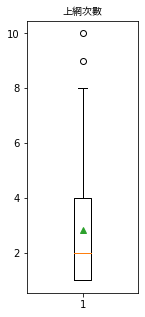

In [26]:
plt.figure(figsize=(2,5))
plt.boxplot(dm5['上網次數'],showmeans=True)
plt.title('上網次數',fontproperties=myfont)
plt.show()

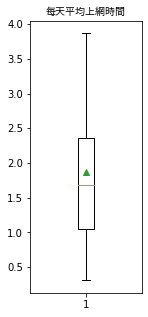

In [27]:
plt.figure(figsize=(2,5))
plt.boxplot(dm5['每天平均上網時間'],showmeans=True)
plt.title('每天平均上網時間',fontproperties=myfont)
plt.show()

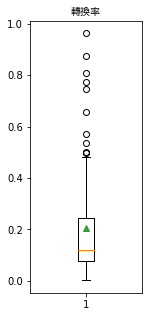

In [28]:
plt.figure(figsize=(2,5))
plt.boxplot(dm5['轉換率'],showmeans=True)
plt.title('轉換率',fontproperties=myfont)
plt.show()

In [29]:
maxoutlier=dm5['上網次數'] > dm5['上網次數'].mean() + 1.5* dm5['上網次數'].std()
dm5[maxoutlier]

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
21,22,1,1,0,8,1.0,0.302236,3.702887
18,19,1,0,1,6,5.0,0.164534,3.513157
19,20,0,1,1,6,1.0,0.176579,1.763558
20,21,0,1,1,7,5.0,0.806526,3.403879
21,22,1,1,0,8,1.0,0.302236,3.702887
22,23,0,0,1,9,3.0,0.962135,3.532903
23,24,0,1,1,10,1.0,0.098676,3.868294


In [30]:
minoutlier=dm5['上網次數'] < dm5['上網次數'].mean() - 1.5* dm5['上網次數'].std()
dm5[minoutlier]

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間


In [31]:
dm5[(maxoutlier | minoutlier)] 

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
21,22,1,1,0,8,1.0,0.302236,3.702887
18,19,1,0,1,6,5.0,0.164534,3.513157
19,20,0,1,1,6,1.0,0.176579,1.763558
20,21,0,1,1,7,5.0,0.806526,3.403879
21,22,1,1,0,8,1.0,0.302236,3.702887
22,23,0,0,1,9,3.0,0.962135,3.532903
23,24,0,1,1,10,1.0,0.098676,3.868294


In [32]:
#刪除法
dm5.drop(index=[18,19,20,21,22,23])


,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
5,6,1,1,2,1,1.0,0.040898,0.306576
28,29,1,0,1,2,1.0,0.198549,0.617996
45,46,1,1,1,1,3.0,0.010430,0.820195
35,36,1,0,1,4,1.0,0.087930,1.676130
5,6,1,1,2,1,1.0,0.040898,0.306576
...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,3.0,0.010430,0.820195
46,47,0,0,1,2,1.0,0.128306,1.656408
47,48,0,0,0,2,2.0,0.068182,2.699137
48,49,0,1,1,3,1.0,0.747647,1.518413


# **資料一般化**

In [33]:
# 為了方便比較新舊欄位，增加"上網次數區間"
columns = dm5.columns.tolist()
new_col = '上網次數區間'
dm5.columns.insert(8, new_col)

# 將 numerical 轉換成 categorical 欄位
labels = [f' {i}' for i in range(1, 4)]
dm5[new_col] = pd.cut(x=dm5.上網次數, bins=3, labels=labels)
dm6=pd.DataFrame(dm5)
dm6


,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間,上網次數區間
5,6,1,1,2,1,1.0,0.040898,0.306576,1
28,29,1,0,1,2,1.0,0.198549,0.617996,1
45,46,1,1,1,1,3.0,0.010430,0.820195,1
35,36,1,0,1,4,1.0,0.087930,1.676130,1
21,22,1,1,0,8,1.0,0.302236,3.702887,3
...,...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,3.0,0.010430,0.820195,1
46,47,0,0,1,2,1.0,0.128306,1.656408,1
47,48,0,0,0,2,2.0,0.068182,2.699137,1
48,49,0,1,1,3,1.0,0.747647,1.518413,1


# **相關係數**

In [34]:
dm6.corr(method='pearson')  # kendall: spearman

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間
編號,1.000000,-0.144174,0.026675,-0.096422,0.197203,-0.267038,-0.011675,0.079056
購買與否,-0.144174,1.000000,-0.150756,0.122393,-0.123429,-0.029151,-0.338817,-0.237203
性別,0.026675,-0.150756,1.000000,0.128282,0.042177,0.036134,0.116755,0.119795
世代,-0.096422,0.122393,0.128282,1.000000,-0.177397,-0.085119,-0.027383,-0.251474
上網次數,0.197203,-0.123429,0.042177,-0.177397,1.000000,-0.076519,0.349663,0.605355
區域,-0.267038,-0.029151,0.036134,-0.085119,-0.076519,1.000000,0.274898,0.266227
轉換率,-0.011675,-0.338817,0.116755,-0.027383,0.349663,0.274898,1.000000,0.313963
每天平均上網時間,0.079056,-0.237203,0.119795,-0.251474,0.605355,0.266227,0.313963,1.000000


In [35]:
dm6.corr(method='pearson')['上網次數'].abs() >= 0.3

編號          False
購買與否        False
性別          False
世代          False
上網次數         True
區域          False
轉換率          True
每天平均上網時間     True
Name: 上網次數, dtype: bool

In [36]:
dm6.corr(method='pearson')['每天平均上網時間'].abs() >= 0.3

編號          False
購買與否        False
性別          False
世代          False
上網次數         True
區域          False
轉換率          True
每天平均上網時間     True
Name: 每天平均上網時間, dtype: bool

In [37]:
dm6

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間,上網次數區間
5,6,1,1,2,1,1.0,0.040898,0.306576,1
28,29,1,0,1,2,1.0,0.198549,0.617996,1
45,46,1,1,1,1,3.0,0.010430,0.820195,1
35,36,1,0,1,4,1.0,0.087930,1.676130,1
21,22,1,1,0,8,1.0,0.302236,3.702887,3
...,...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,3.0,0.010430,0.820195,1
46,47,0,0,1,2,1.0,0.128306,1.656408,1
47,48,0,0,0,2,2.0,0.068182,2.699137,1
48,49,0,1,1,3,1.0,0.747647,1.518413,1


In [38]:
dm5

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間,上網次數區間
5,6,1,1,2,1,1.0,0.040898,0.306576,1
28,29,1,0,1,2,1.0,0.198549,0.617996,1
45,46,1,1,1,1,3.0,0.010430,0.820195,1
35,36,1,0,1,4,1.0,0.087930,1.676130,1
21,22,1,1,0,8,1.0,0.302236,3.702887,3
...,...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,3.0,0.010430,0.820195,1
46,47,0,0,1,2,1.0,0.128306,1.656408,1
47,48,0,0,0,2,2.0,0.068182,2.699137,1
48,49,0,1,1,3,1.0,0.747647,1.518413,1


In [39]:
dm6=dm5
columns = dm6.columns.tolist()
new_col = '時間與轉換共變'
dm6.columns.insert(10, new_col)
for i in range(dm6.shape[0]):
   dm6[new_col]=dm6.每天平均上網時間 * dm6.上網次數
dm6

,編號,購買與否,性別,世代,上網次數,區域,轉換率,每天平均上網時間,上網次數區間,時間與轉換共變
5,6,1,1,2,1,1.0,0.040898,0.306576,1,0.306576
28,29,1,0,1,2,1.0,0.198549,0.617996,1,1.235992
45,46,1,1,1,1,3.0,0.010430,0.820195,1,0.820195
35,36,1,0,1,4,1.0,0.087930,1.676130,1,6.704522
21,22,1,1,0,8,1.0,0.302236,3.702887,3,29.623098
...,...,...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,3.0,0.010430,0.820195,1,0.820195
46,47,0,0,1,2,1.0,0.128306,1.656408,1,3.312816
47,48,0,0,0,2,2.0,0.068182,2.699137,1,5.398275
48,49,0,1,1,3,1.0,0.747647,1.518413,1,4.555239


# **判斷解釋力**

## **Y=類別 X=類別**

In [40]:
!pip install scipy

In [41]:
from scipy.stats import chi2_contingency 
import pandas as pd
import numpy as np
dm7=dm6
dm7=pd.DataFrame(dm7)
cross_tab = pd.pivot_table(data=dm7, values='編號', 
              index='購買與否', columns='性別', margins=True, aggfunc=np.sum)
cross_tab

性別,0,1,All
購買與否,,,
0,465,585,1050
1,577,297,874
All,1042,882,1924


In [42]:
import scipy.stats
scipy.stats.chi2_contingency(cross_tab, correction = False)
# 檢定值、P值、自由度、檢測內容

(90.73870208768854,
 9.174284673640399e-19,
 4,
 array([[ 568.65904366,  481.34095634, 1050.        ],
        [ 473.34095634,  400.65904366,  874.        ],
        [1042.        ,  882.        , 1924.        ]]))

In [43]:
p_value = scipy.stats.chi2_contingency(cross_tab, correction = False)[1]
p_value

9.174284673640399e-19

## **Y=類別 X=連續**

In [44]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [45]:
logit = sm.Logit(dm6['購買與否'], dm6['上網次數'])
# 擬合模型
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.690584
         Iterations 4


In [46]:
result.summary()
# 購買與否 = (截距項) + 上網次數

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   購買與否   No. Observations:                   80
Model:                          Logit   Df Residuals:                       79
Method:                           MLE   Df Model:                            0
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                0.003698
Time:                        08:10:21   Log-Likelihood:                -55.247
converged:                       True   LL-Null:                       -55.452
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
上網次數          -0.0411      0.064     -0.638      0.524      -0.167       0.085
==============================================================================
"""

## Y=數值 X=數值  請參考上面相關分析
## Y=數值 X=類別  T檢定、Z檢定等，但數據大很容易顯著，故沒有實值意義